### 一開始先把資料導入近來

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [10]:
house_data = pd.read_csv('house.csv',low_memory=False)
house_data.head() # check part of data

,主建物面積,主要建材,主要用途,交易標的,土地位置建物門牌,廳數,房,衛,有無管理組織,移轉層次,總價元,總樓層數,車位總價元,車位類別,都市土地使用分區,鄉鎮市區,附屬建物面積,陽台面積,電梯,建物型態2,土地,建物,車位,trade_date,build_date,土地面積,建物面積,單價元坪
0,192.826731,鋼筋混凝土造,住家用,房地,臺中市南區工學一街１７９巷８號３樓之５,1,3,1,有,三層,4850000,十二層,0,坡道機械,住,南區,0.000000,14.809939,NaN,住宅大樓,1,1,0.000000,2016-09-28,1998-09-01,44.826512,305.983922,173216.78442
1,81.223260,鋼筋混凝土造,住家用,房地,臺中市西區三民路一段３９巷３弄９號６樓之６,0,2,2,有,六層,1500000,十二層,0,NaN,住,西區,0.000000,20.528956,NaN,住宅大樓,3,1,0.000000,2016-10-13,1994-05-01,14.479360,143.471286,114254.71398
2,333.653385,鋼筋混凝土造,見其他登記事項,房地,臺中市南區工學北路３５７號１１樓之２,2,4,2,有,十一層,15680000,二十六層,0,坡道平面,住,南區,21.090940,41.289317,NaN,住宅大樓,1,1,151.471298,2016-10-01,2014-10-01,85.190208,754.645741,227068.10352
3,263.471463,鋼筋混凝土造,見其他登記事項,房地,臺中市南區五權南一路５５號十五樓之一,2,3,2,有,十五層,8900000,十五層,0,坡道平面,住,南區,7.834722,12.528944,NaN,住宅大樓,1,1,98.611716,2016-10-05,2012-05-01,51.900903,503.736280,193081.27653
4,532.331364,鋼筋混凝土造,見其他登記事項,房地,臺中市西區大墩十一街９號十二樓之五,2,4,3,無,十二層,26900000,十四層,0,坡道平面,住,西區,27.570289,53.124045,NaN,住宅大樓,1,1,271.735938,2016-09-08,2013-05-01,163.868010,1183.968689,248291.27532


### 檢查資料樣態

In [11]:
house_data.info() #先檢查是否有空值，所有column都是有資料的

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145485 entries, 0 to 145484
Data columns (total 28 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   主建物面積       145485 non-null  float64
 1   主要建材        145480 non-null  object 
 2   主要用途        145485 non-null  object 
 3   交易標的        145485 non-null  object 
 4   土地位置建物門牌    145485 non-null  object 
 5   廳數          145485 non-null  int64  
 6   房           145485 non-null  int64  
 7   衛           145485 non-null  int64  
 8   有無管理組織      145485 non-null  object 
 9   移轉層次        145144 non-null  object 
 10  總價元         145485 non-null  int64  
 11  總樓層數        145468 non-null  object 
 12  車位總價元       145485 non-null  int64  
 13  車位類別        82128 non-null   object 
 14  都市土地使用分區    136371 non-null  object 
 15  鄉鎮市區        145485 non-null  object 
 16  附屬建物面積      145485 non-null  float64
 17  陽台面積        145485 non-null  float64
 18  電梯          52675 non-null   object 
 19  建物

In [12]:
print('簡單查看不同column 內的數值長相與個數\n')
for col_name in list(house_data.columns):
    value = list(house_data[col_name].unique())
    if len(value)>10:
        print(col_name,len(value), 'first 10 is  ', value[:10]) #get first 10
    else:
        print(col_name,len(value), 'contains ', value)

簡單查看不同column 內的數值長相與個數

主建物面積 23366 first 10 is   [192.8267307, 81.2232603, 333.6533847, 263.471463, 532.3313637, 288.6946407, 51.0083397, 251.7028506, 569.8851381, 259.07476230000003]
主要建材 84 first 10 is   ['鋼筋混凝土造', '見其他登記事項', '加強磚造', '鋼骨鋼筋混凝土造', '鋼筋混凝土加強磚造', '磚造', '見其它登記事項', '鋼造', '預力混凝土造', '鋼骨混凝土造']
主要用途 356 first 10 is   ['住家用', '見其他登記事項', '住商用', '國民住宅', '住工用', '停車空間，住房', '停車空間，住房，水塔', '集合住宅', '住宅、住宅附屬停車空間、樓梯間、電梯間', '住宅、停車空間、樓梯間']
交易標的 2 contains  ['房地', '建物']
土地位置建物門牌 136354 first 10 is   ['臺中市南區工學一街１７９巷８號３樓之５', '臺中市西區三民路一段３９巷３弄９號６樓之６', '臺中市南區工學北路３５７號１１樓之２', '臺中市南區五權南一路５５號十五樓之一', '臺中市西區大墩十一街９號十二樓之五', '臺中市東區信義街２３０－４號', '臺中市西區向上路一段２８９巷９號５樓之１２', '臺中市南區工學路１４６巷４５號８樓之３', '臺中市西區忠明南路１２２號１８樓之１', '臺中市北區南京東路二段６２號４樓']
廳數 29 first 10 is   [1, 0, 2, 3, 5, 8, 4, 6, 7, 11]
房 57 first 10 is   [3, 2, 4, 0, 6, 5, 9, 1, 10, 8]
衛 57 first 10 is   [1, 2, 3, 0, 5, 6, 7, 4, 8, 9]
有無管理組織 2 contains  ['有', '無']
移轉層次 214 first 10 is   ['三層', '六層', '十一層', '十五層', '十二層', '一層', '五層', '八層', '十八層', '四層']
總價元 547

### 資料清洗

我們想要先濾掉雜亂的資訊，只保留原先就是數字的以及交易標的，車位類別，鄉鎮市區，電梯，建物型態，以及交易日期根建物年紀
建物年紀以及交易日期，讓我們轉換成具今天幾個月的距離，至於其他我們可以用one hot encoder去轉置
剩餘沒使用到的我們就先刪除

In [13]:
col_is_numeric = ['主建物面積', '廳數', '房', '衛', '總價元','車位總價元', '附屬建物面積', '陽台面積', '土地', '建物', '車位', '土地面積', '建物面積',]
col_to_drop = ['主要建材', '主要用途', '土地位置建物門牌', '移轉層次', '總樓層數', '都市土地使用分區']
col_is_date = ['trade_date', 'build_date']
col_one_hot_encode = ['交易標的','車位類別','鄉鎮市區','電梯','建物型態2','有無管理組織']

In [14]:
# 去計算買賣日期跟屋齡，我們這邊把她轉換成跟今天的月份差距
def months_from_today(date_str):
    given_date = datetime.strptime(date_str, '%Y-%m-%d')
    current_date = datetime.now()
    months_diff = (current_date.year - given_date.year) * 12 + current_date.month - given_date.month
    return months_diff

for col in col_is_date:
    house_data[col] = house_data[col].apply(months_from_today)

In [15]:
# drop columns
house_data.drop(col_to_drop, axis=1, inplace=True)

In [16]:
# One-hot encode columns
df_to_train = pd.get_dummies(house_data, columns=col_one_hot_encode)

In [36]:
# 因為總價幾乎都是百萬，這樣子要預測的值會很大，我們先正規化
df_to_train['總價元'] = df_to_train['總價元']/1000000

In [18]:
df_to_train.head()

,主建物面積,廳數,房,衛,總價元,車位總價元,附屬建物面積,陽台面積,土地,建物,車位,trade_date,build_date,土地面積,建物面積,單價元坪,交易標的_建物,交易標的_房地,車位類別_一樓平面,車位類別_其他,車位類別_升降平面,車位類別_升降機械,車位類別_坡道平面,車位類別_坡道機械,車位類別_塔式車位,鄉鎮市區_中區,鄉鎮市區_北區,鄉鎮市區_北屯區,鄉鎮市區_南區,鄉鎮市區_南屯區,鄉鎮市區_后里區,鄉鎮市區_和平區,鄉鎮市區_外埔區,鄉鎮市區_大安區,鄉鎮市區_大甲區,鄉鎮市區_大肚區,鄉鎮市區_大里區,鄉鎮市區_大雅區,鄉鎮市區_太平區,鄉鎮市區_新社區,鄉鎮市區_東勢區,鄉鎮市區_東區,鄉鎮市區_梧棲區,鄉鎮市區_沙鹿區,鄉鎮市區_清水區,鄉鎮市區_潭子區,鄉鎮市區_烏日區,鄉鎮市區_石岡區,鄉鎮市區_神岡區,鄉鎮市區_西區,鄉鎮市區_西屯區,鄉鎮市區_豐原區,鄉鎮市區_霧峰區,鄉鎮市區_龍井區,電梯_有,電梯_無,建物型態2_住宅大樓,建物型態2_公寓,建物型態2_華廈,建物型態2_透天厝,有無管理組織_有,有無管理組織_無
0,192.826731,1,3,1,4.85,0,0.000000,14.809939,1,1,0.000000,100,316,44.826512,305.983922,173216.78442,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
1,81.223260,0,2,2,1.50,0,0.000000,20.528956,3,1,0.000000,99,368,14.479360,143.471286,114254.71398,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False
2,333.653385,2,4,2,15.68,0,21.090940,41.289317,1,1,151.471298,99,123,85.190208,754.645741,227068.10352,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
3,263.471463,2,3,2,8.90,0,7.834722,12.528944,1,1,98.611716,99,152,51.900903,503.736280,193081.27653,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,532.331364,2,4,3,26.90,0,27.570289,53.124045,1,1,271.735938,100,140,163.868010,1183.968689,248291.27532,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True


現在已經準備好可以訓練用的資料，下一步觀察資料關聯性

#### 資料關聯性

因為標題是中文字，引此許多印不出來，但圖案從左至右，在從上到下是column 依序畫的圖
但可以發現數據及集為左偏的形式，而非典型鐘型曲線


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events

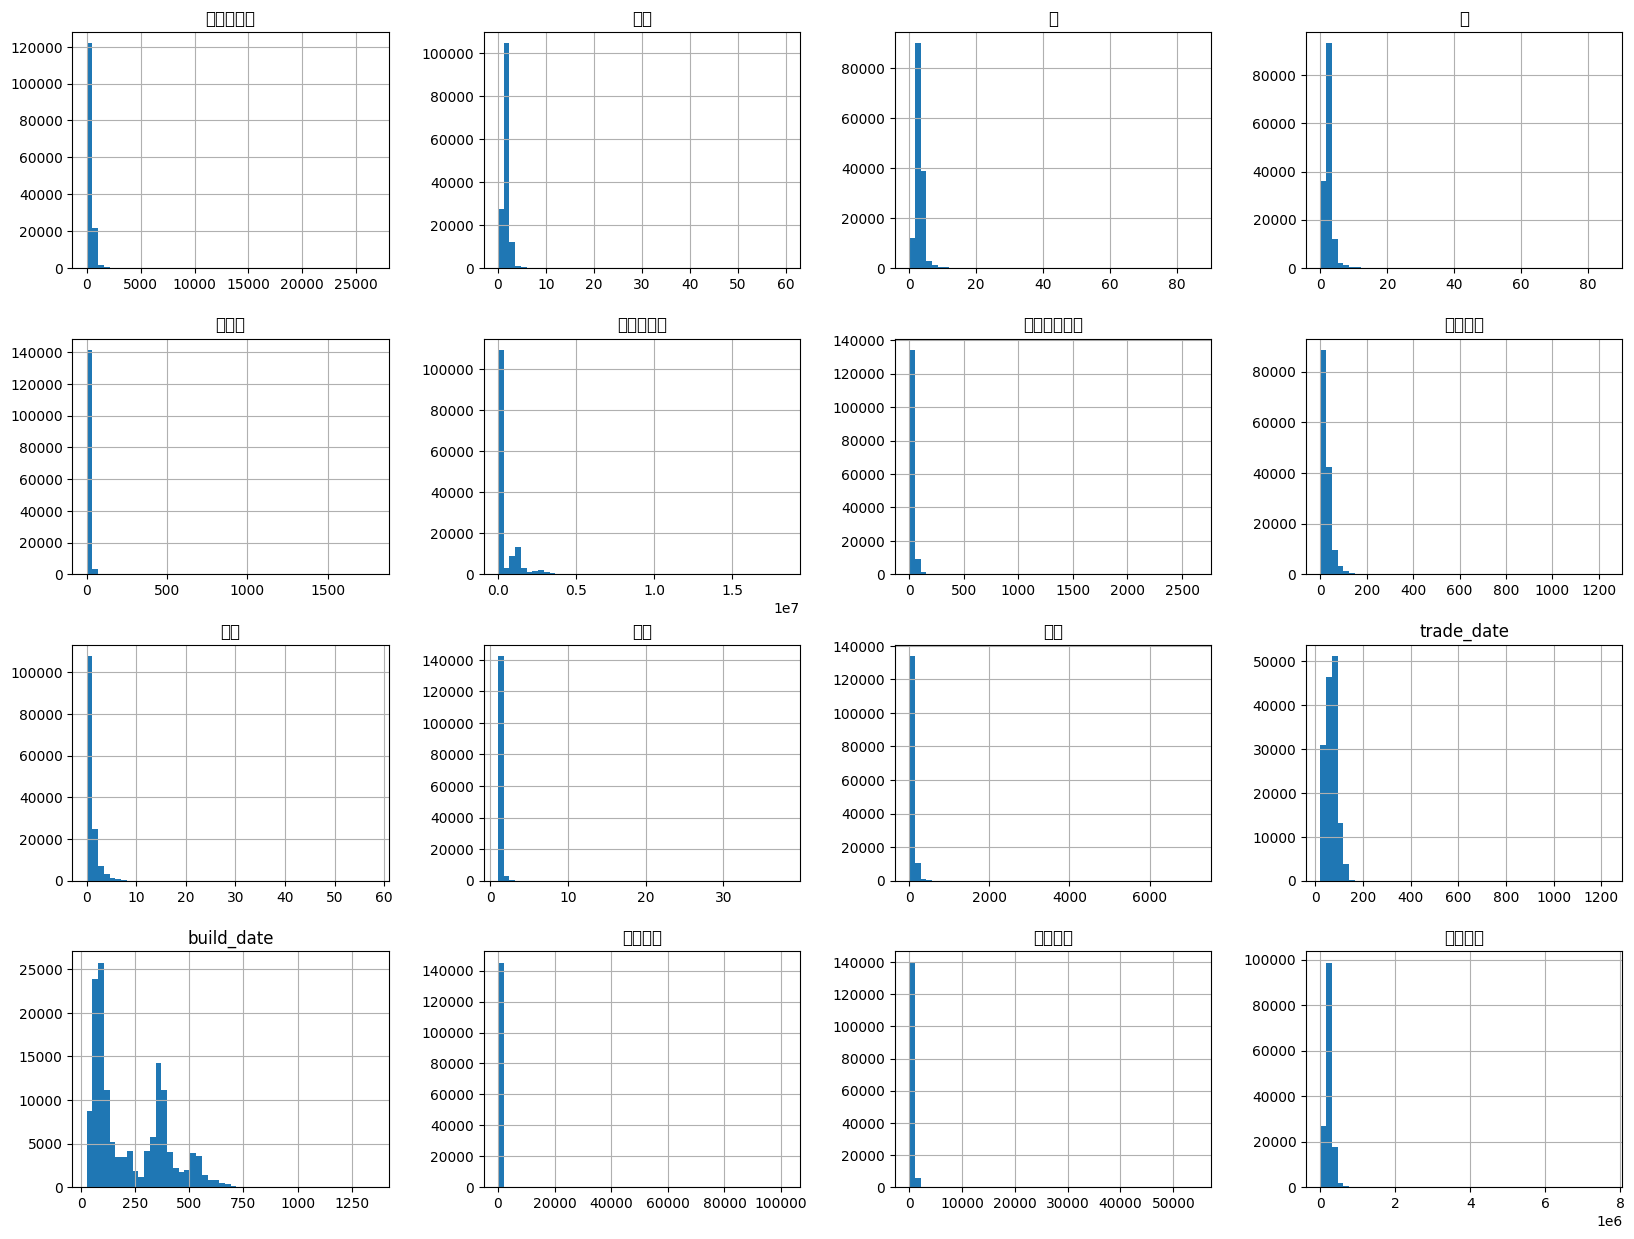

In [25]:
columns_to_plot = list(df_to_train.columns)[:16]
df_to_train[columns_to_plot].hist(bins=50, figsize=(20,15))
print('因為標題是中文字，引此許多印不出來，但圖案從左至右，在從上到下是column 依序畫的圖')
print('但可以發現數據及集為左偏的形式，而非典型鐘型曲線')

移除極端值後:
更貼像鐘型曲線


array([[<Axes: title={'center': '主建物面積'}>,
        <Axes: title={'center': '廳數'}>, <Axes: title={'center': '房'}>,
        <Axes: title={'center': '衛'}>],
       [<Axes: title={'center': '總價元'}>,
        <Axes: title={'center': '車位總價元'}>,
        <Axes: title={'center': '附屬建物面積'}>,
        <Axes: title={'center': '陽台面積'}>],
       [<Axes: title={'center': '土地'}>, <Axes: title={'center': '建物'}>,
        <Axes: title={'center': '車位'}>,
        <Axes: title={'center': 'trade_date'}>],
       [<Axes: title={'center': 'build_date'}>,
        <Axes: title={'center': '土地面積'}>,
        <Axes: title={'center': '建物面積'}>,
        <Axes: title={'center': '單價元坪'}>]], dtype=object)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events

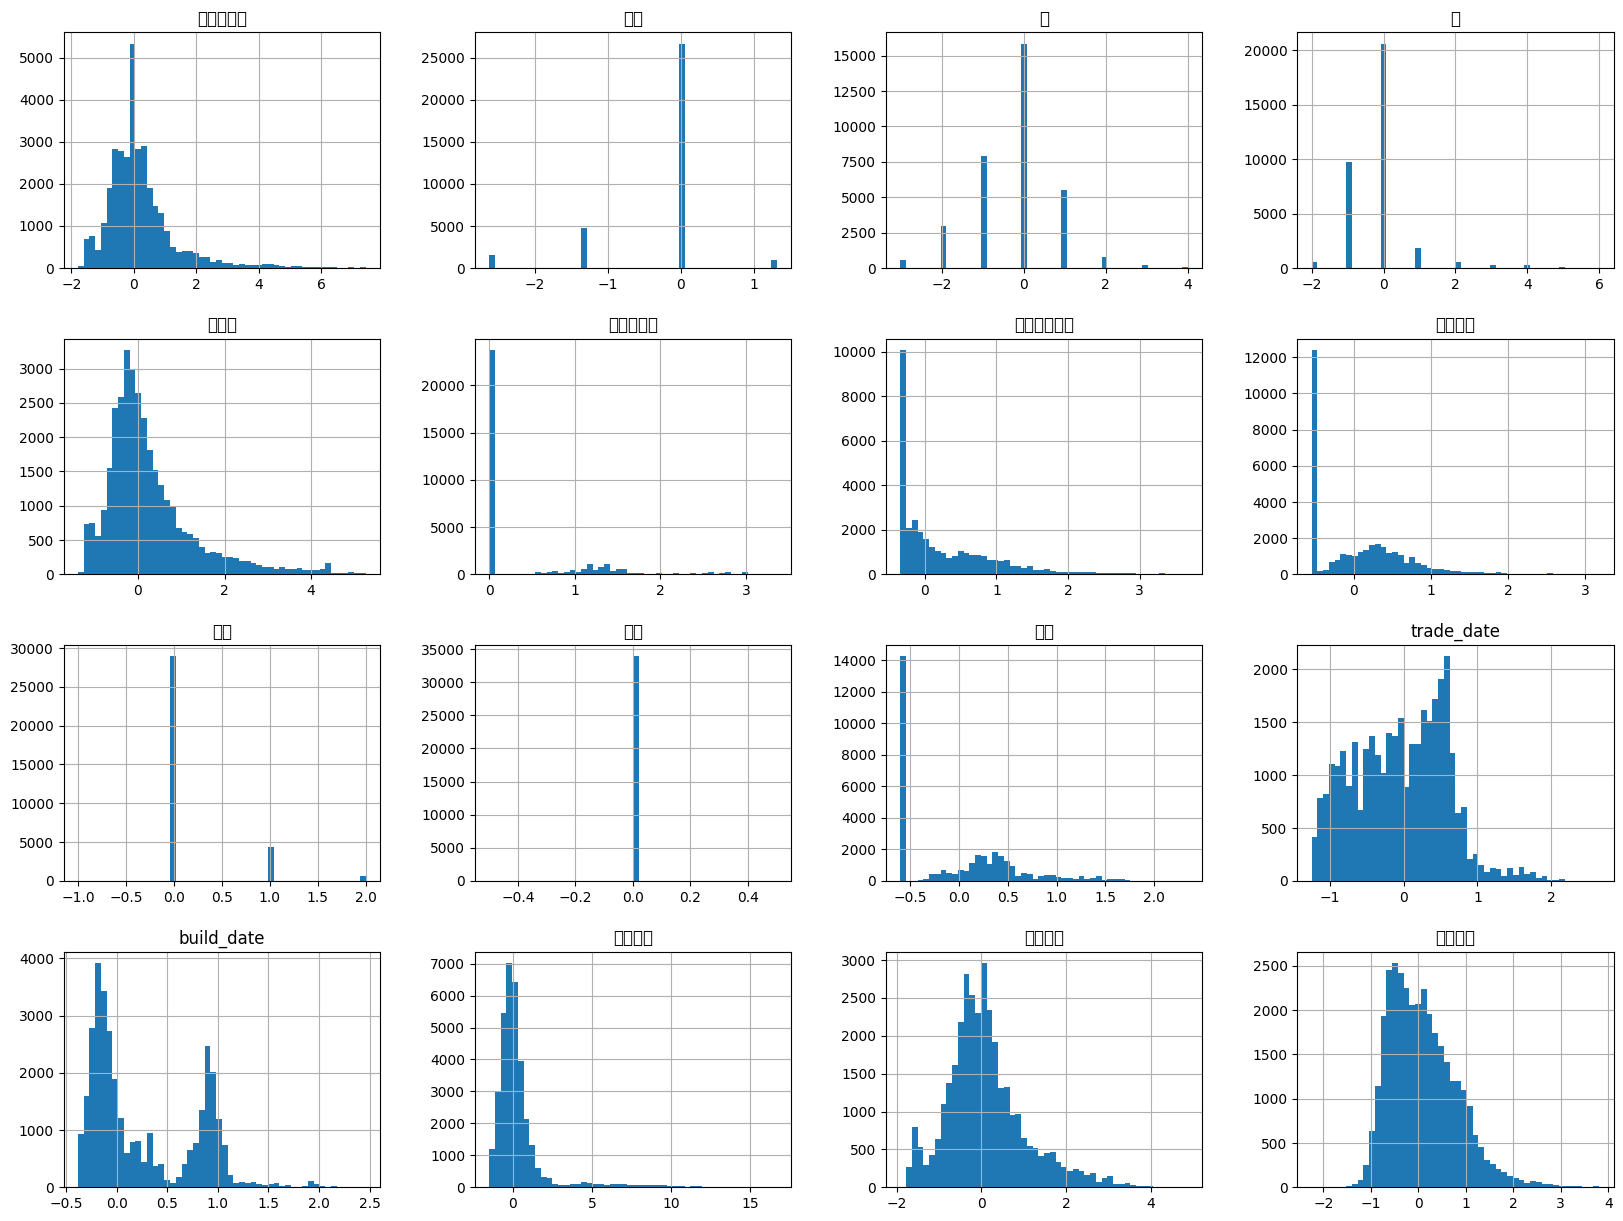

In [68]:
# 移除極端異常值
Q_LOW = df_to_train.quantile(0.01)
Q_HIGH = df_to_train.quantile(0.99)
IQR = Q_HIGH - Q_LOW

df_outliers_removed = df_to_train[~((df_to_train < (Q_LOW - 1.5 * IQR)) | (df_to_train > (Q_HIGH + 1.5 * IQR))).any(axis=1)]

print("移除極端值後:\n更貼像鐘型曲線", )

col = list(df_outliers_removed.columns)[:16]
df_to_train[col].hist(bins=50, figsize=(20,15))

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier

In [72]:
# 把資料正規化
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df_outliers_removed)
df_to_train = pd.DataFrame(scaled_data, columns=df_outliers_removed.columns)

# 首先先把用來input的資料跟要輸出的拆開
col_for_x = [x for x in list(df_to_train.columns) if x!='總價元']
X = df_to_train[col_for_x]
y = df_to_train['總價元']

# 拆分資料成訓練跟測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 呼叫linear regression
linear = LinearRegression()

linear.fit(X_train, y_train)

# 去檢驗我們訓練出來的資料跟真實資料差異
y_pred = linear.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')

# 交叉驗證
scores = cross_val_score(linear, X_test, y_test, scoring='neg_mean_squared_error', cv=10)
linear_rmse_score = np.sqrt(-scores)
print('交叉驗證結果: ', linear_rmse_score)

Root Mean Squared Error: 0.22648374428845747
交叉驗證結果:  [0.21695544 0.23144662 0.22607314 0.22204786 0.23682996 0.21608655
 0.24111651 0.21969699 0.23494494 0.22555891]


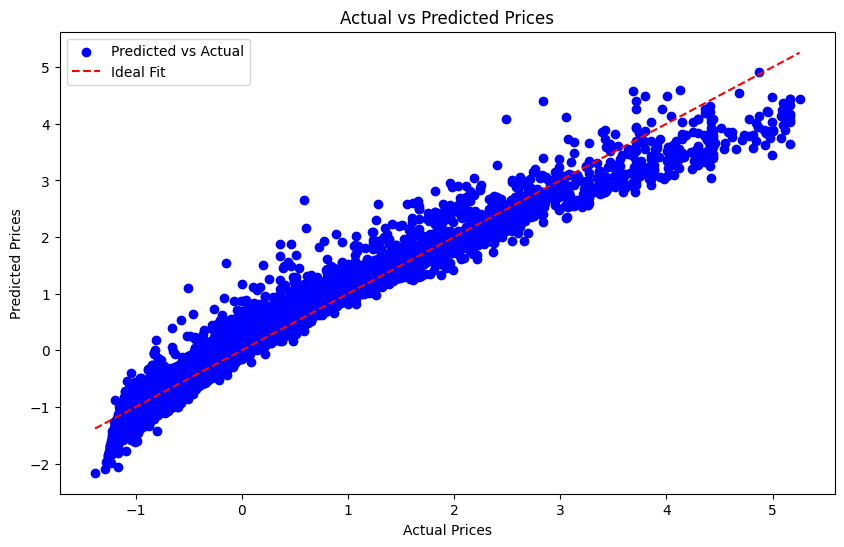

In [73]:
# 圖像化來看預測的跟實際值差異
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [70]:
# 把資料正規化
# scaler = RobustScaler()
# scaled_data = scaler.fit_transform(df_outliers_removed)
# df_to_train = pd.DataFrame(scaled_data, columns=df_outliers_removed.columns)

# 首先先把用來input的資料跟要輸出的拆開
col_for_x = [x for x in list(df_outliers_removed.columns) if x!='總價元']
X = df_to_train[col_for_x]
y = df_to_train['總價元'].astype(int)

# 拆分資料成訓練跟測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 呼叫linear regression
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

# 去檢驗我們訓練出來的資料跟真實資料差異
y_pred = forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')

# 交叉驗證
scores = cross_val_score(forest, X_test, y_test, scoring='neg_mean_squared_error', cv=10)
forest_rmse_score = np.sqrt(-scores)
print('交叉驗證結果: ', forest_rmse_score)

Root Mean Squared Error: 0.20678551137480228
交叉驗證結果:  [0.25268694 0.25268694 0.25073566 0.24889135 0.26235452 0.2508589
 0.25667107 0.29079621 0.25474842 0.28046877]
